<span style="font-weight: bold; font-size:40px; color:#2196F3">04-1</span>
# 데이터 시각화가 필요한 이유

<span style="font-weight: bold; font-size:20px; color:#2196F3">엔스콤 4분할 그래프 살펴보기</span>

데이터 시각화를 보여주는 전형적인 사례로 엔스콤 4분할 그래프(Anscombe's quartet)가 있다. 이 그래프는 영국의 프랭크 앤스콤(Frank Anscombe)이 데이터를 시각화하지 않고 수치만 확인할 때 발생할 수 있는 함정을 보여주기 위해 만든 그래프이다. 그러면 엑스콤이 지적한 '함정'이란 무엇일까?

### 앤스콤이 지적한 함정과 데이터 시각화의 필요성
앤스콤 4분할 그래프는 구성하는 데이터 집합은 4개의 그룹으로 구성되어 있으며 모든 데이터 그룹은 x, y 열을 가지고 있다. 그런데 이 4개의 그룹은 각각 평균, 분산과 같은 수치값이나 상관관계, 회귀선이 같다는 특징이 있다. 그래서 이런 결과만 보고 '데이터 그룹 1, 2, 3, 4의 데이터는 모두 같은 것이다'라고 착각할 수 있다. 바로 이것이 앤스콤이 지적한 '함정'이다. 하지만 각 데이터 그룹을 시각화하면 데이터 그룹이 서로 다른 데이터 패턴을 가지고 있다는 점을 금방 알 수 있다. 이런 점에서 데이터 시각화는 데이터 분석 분야에서 아주 중요한 요소라고 할 수 있다. 그러면 데이터 시각화란 무엇인지 직접 실습하며 알아보겠다.

### 앤스콤 데이터 집합 불러온 후 그래프 그리기

#### 1. 앤스콤 데이터 집합 불러오기
앤스콤 데이터 집합은 seaborn 라이브러리에 포함되어 있다. seaborn 라이브러리의 load_dataset 메서드에 문자열 anscombe을 전달하면 앤스콤 데이터 집합을 불러올 수 있다. 이때 데이터 프레임의 열 이름 중 dataset 열이 데이터 그룹을 구분한다는 것을 알 수 있다.

In [1]:
import seaborn as sns

anscombe = sns.load_dataset("anscombe")
print(anscombe)
print(type(anscombe))

   dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV   8.0   5.25
40      IV  19.0

3. 피클은 바이너리 형태의 오브젝트이기 때문에 저장된 피클 데이터를 편집기와 같은 프로그램으로 열어보면 이상한 문자가 나타난다. 피클 데이터는 반드시 read_pickle 메서드로 읽어 들여야 한다.

In [24]:
scientists_names_from_pickle = pd.read_pickle('scientists_names_series.pickle')
print(scientists_names_from_pickle)

0       Rosaline Franklin
1          William Gosset
2    Florence Nightingale
3             Marie Curie
4           Rachel Carson
5               John Snow
6             Alan Turing
7            Johann Gauss
Name: Name, dtype: object


In [25]:
scientists_from_pickle = pd.read_pickle('scientists_df.pickle')
print(scientists_from_pickle)

                   Name        Born        Died  Age          Occupation
0     Rosaline Franklin  1920-07-25  1958-04-16   37             Chemist
1        William Gosset  1876-06-13  1937-10-16   61        Statistician
2  Florence Nightingale  1820-05-12  1910-08-13   90               Nurse
3           Marie Curie  1867-11-07  1934-07-04   66             Chemist
4         Rachel Carson  1907-05-27  1964-04-14   56           Biologist
5             John Snow  1813-03-15  1858-06-16   45           Physician
6           Alan Turing  1912-06-23  1954-06-07   41  Computer Scientist
7          Johann Gauss  1777-04-30  1855-02-23   77       Mathematician


#### 2. matplotlib 라이브러리로 그래프 그리기
앤스콤 데이터 집합이 준비되었으면 이제 그래프로 시각화를 하면 된다. 이 책에서는 그래프를 그리기 위해 matplotlib 라이브러리를 사용한다. 먼저 그래프를 그리기 위해 matplotlib 라이브러리를 불러오겠다.

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt

3. 다음은 anscombe 데이터프레임의 dataset 열에서 데이터 값이 I인 것만 추출한 것이다. 즉, 첫 번째 데이터 그룹을 추출한 것이다.

In [3]:
dataset_1 = anscombe[anscombe['dataset']=='I']

4. 선 그래프는 plot 메서드로 그릴 수 있다. plot 메서드에 x, y축 데이터를 전달하면 선 그래프가 나타난다. 앞에서 준비한 dataset_1의 x, y열을 전달하자.

<IPython.core.display.Javascript object>


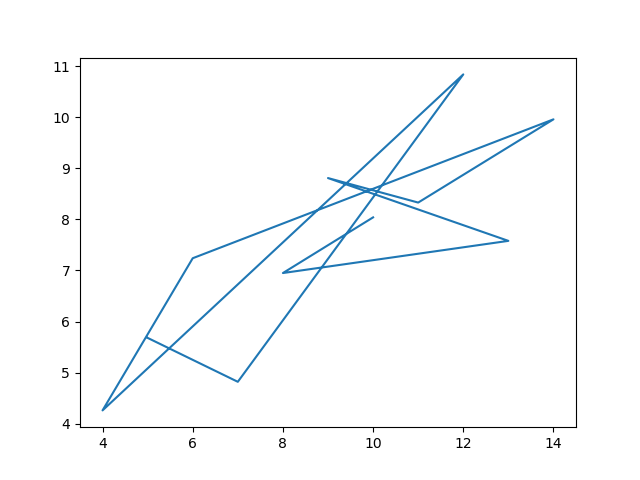

In [15]:
plt.plot(dataset_1['x'], dataset_1['y'])

5. plot 메서드는 기본적으로 선으로 그래프를 그린다. 만약 점으로 그래프를 그리려면 o를 세 번째 인자로 전달하면 된다.

<IPython.core.display.Javascript object>


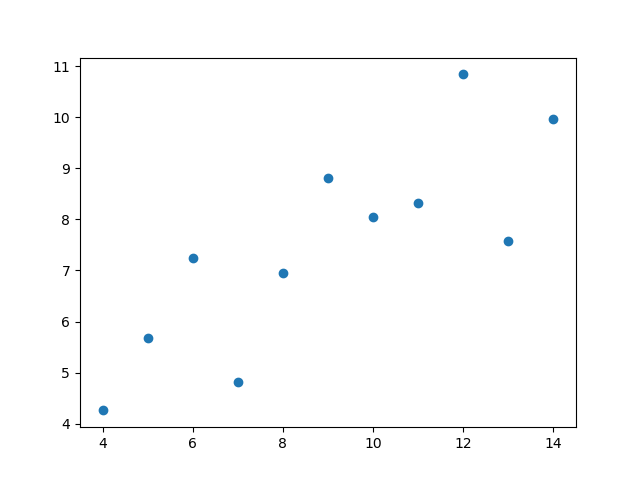

In [17]:
plt.plot(dataset_1['x'], dataset_1['y'], 'o')

<span style="font-weight: bold; font-size:20px; color:#2196F3">앤스콤 데이터 집합 모두 사용해 그래프 만들기</span>

앤스콤 데이터 집합은 4개의 데이터 그룹으로 구성되어 있으며 각 데이터 그룹의 차이를 파악하려면 그래프로 시각화해야 한다고 했다. 이번에는 모든 데이터 그룹에 대하여 그래프를 그려보겠다.

### 앤스콤 데이터 집합 불러온 후 그래프 그리기
이번에 소개할 내용은 'matplotlib 라이브러리로 그래프를 그리는 방법'이다. 아래에 정리한 과정을 잘 읽어보면 블록을 조립하는 과정과 비슷하다는 것을 알 수 있다.

1. 전체 그래프가 위치할 기본 틀을 만든다.
2. 그래프를 그려 넣을 그래프 격자를 만든다.
3. 그런 다음 격자에 그래프를 하나씩 추가한다. 격자에 그래프가 추가되는 순서는 왼쪽에서 오른쪽 방향이다.
4. 만약 격자의 첫 번째 행이 꽉 차면 두 번째 행에 그래프를 그려 넣는다.

즉, 이후 실습에서 앤스콤 데이터 집합으로 그리게 될 그래프 격자 크기는 4이고 세 번째 그래프의 경우 2행 1열 위치에 그려진다. 바로 그래프를 그려보겠다.

### 한 번에 4개의 그래프 그리기
1. 앤스콤 데이터프레임의 dataset 열의 값이 1, 2, 3, 4인 것을 불린 추출하여 dataset_1, 2, 3, 4에 저장한다. dataset_1은 앞에서 추출했다.

In [18]:
dataset_2 = anscombe[anscombe['dataset']=='II']
dataset_3 = anscombe[anscombe['dataset']=='III']
dataset_4 = anscombe[anscombe['dataset']=='IV']

2. 먼저 그래프 격자가 위치할 기본 틀을 만든다.

<IPython.core.display.Javascript object>


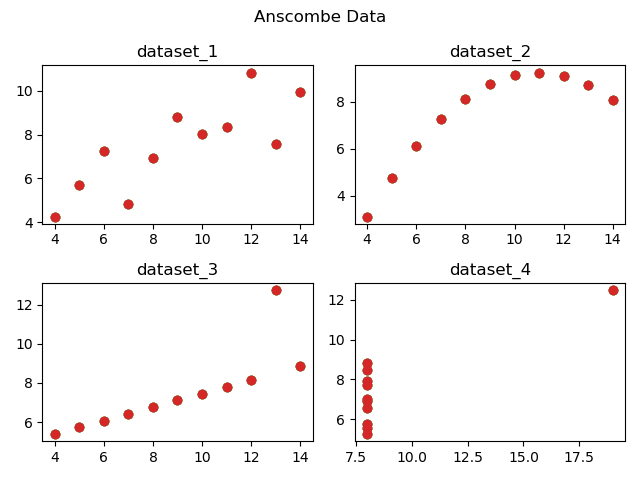

In [51]:
fig = plt.figure()

3. 그런 다음 add_subplot 메서드로 그래프 격자를 그린다. 기본 틀(fig)에 격자를 추가한다는 기분으로 add_subplot 메서드를 사용하면 된다. add_subplot의 첫 번째 인자에는 그래프 기본 틀의 행 크기를, 두 번째 인자에는 그래프 기본 틀의 열 크기를 지정한다.

<IPython.core.display.Javascript object>


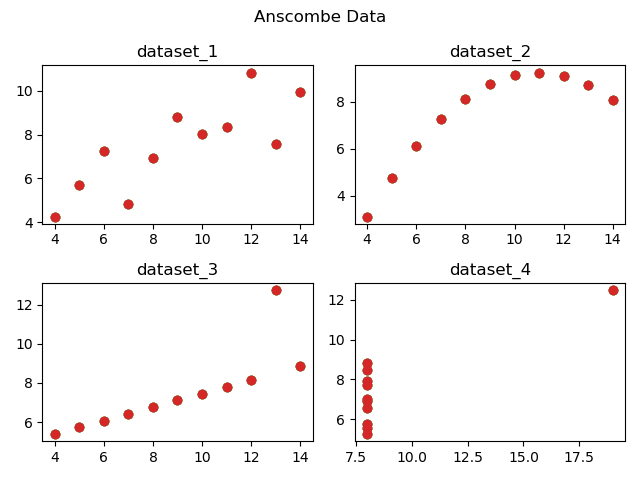

In [52]:
axes1 = fig.add_subplot(2, 2, 1)
axes2 = fig.add_subplot(2, 2, 2)
axes3 = fig.add_subplot(2, 2, 3)
axes4 = fig.add_subplot(2, 2, 4)
fig

4. 이제 plot 메서드에 데이터를 전달하여 그래프를 그리면 된다. 이번에는 점으로 그래프를 표현했다. 그래프를 확인하려면 fig를 반드시 입력해야 한다.

<IPython.core.display.Javascript object>


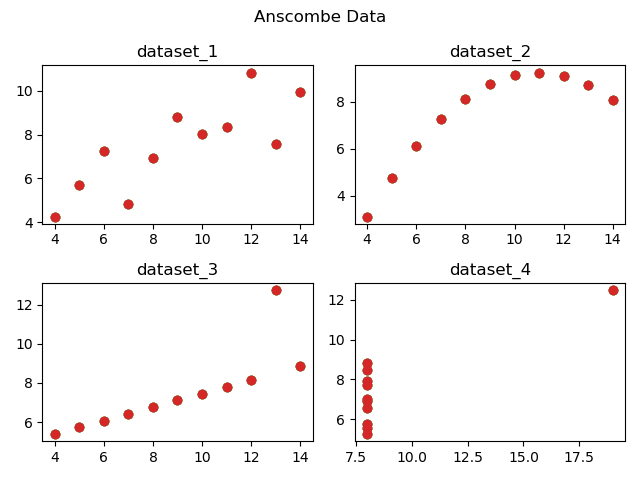

In [56]:
# 점의 색상은 매번 실행할 때마다 다를 수 있다.
axes1.plot(dataset_1['x'], dataset_1['y'], 'o')
axes2.plot(dataset_2['x'], dataset_2['y'], 'o')
axes3.plot(dataset_3['x'], dataset_3['y'], 'o')
axes4.plot(dataset_4['x'], dataset_4['y'], 'o')

fig

5. 각각의 그래프를 쉽게 구분할 수 있도록 그래프 격자에 제목을 추가해 보자. set_title 메서드로 그래프의 이름을 전달하면 그래프 격자에 제목이 추가된다.

<IPython.core.display.Javascript object>


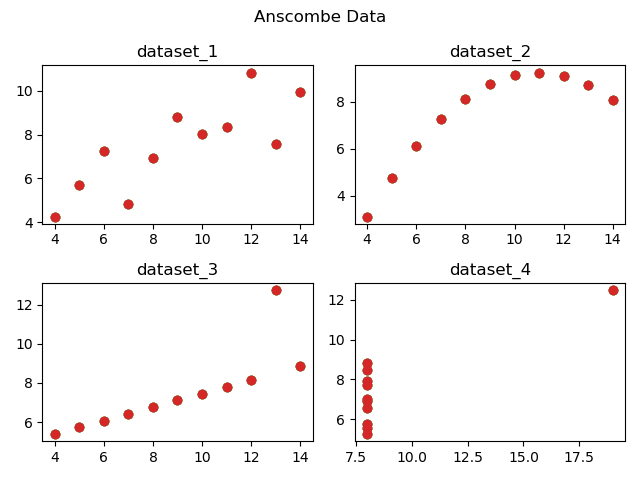

In [57]:
axes1.set_title("dataset_1")
axes2.set_title("dataset_2")
axes3.set_title("dataset_3")
axes4.set_title("dataset_4")

fig

6. 기본 틀에도 제목을 추가해보자. 기본 틀에 제목을 추가하려면 suptitle 메서드를 사용하면 된다.

<IPython.core.display.Javascript object>


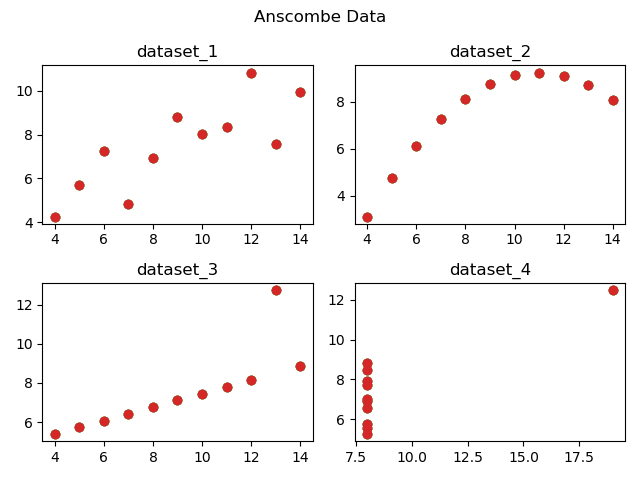

In [58]:
fig.suptitle("Anscombe Data")

fig

7. tight_layout 메서드를 호출하여 각 그래프의 레이아웃을 조절할 수 있다.

<IPython.core.display.Javascript object>


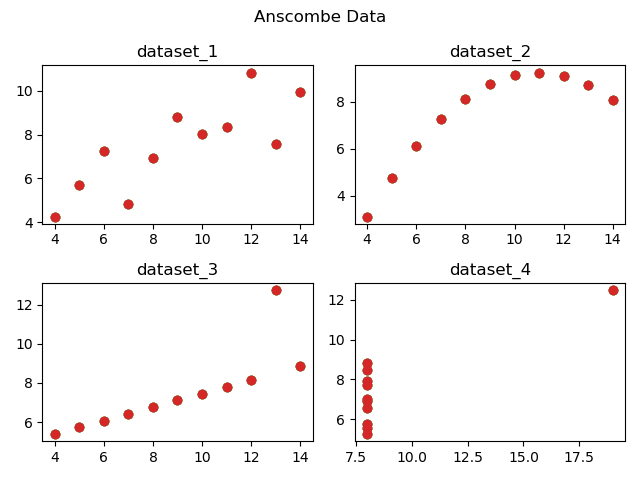

In [60]:
fig.tight_layout()

fig

평균, 분산 상관관계, 회귀선의 통계 수치가 같아도 그래프의 형태는 다를 수 있다. 앤스콤 4분할 그래프는 데이터 분석 시 수치에만 의존하면 잘못된 판단을 할 수 있다는 것을 알려주는 좋은 예시이다.

<span style="font-weight: bold; font-size:20px; color:Gray">출처 : Do it! 데이터 분석을 위한 판다스</span>